In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [2]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [3]:
blobR = 21

In [19]:
npz_path = '/Users/halmamol/NEXT/NBarrays/'
npz_filename_FS = f'tracklimits_FULLSIM.npz' 
npz_filename_DS_p200 = f'tracklimits_DETSIM.npz' 
npz_filename_DS_CM = f'tracklimits_DETSIM_202012.npz' 

In [20]:
d_FS = np.load(npz_path+npz_filename_FS)
d_DS_p200 = np.load(npz_path+npz_filename_DS_p200)
d_DS_CM = np.load(npz_path+npz_filename_DS_CM)

In [21]:
track_0nubb_zmin_FS = d_FS['track_0nubb_zmin']
track_0nubb_zmax_FS = d_FS['track_0nubb_zmax']
track_0nubb_rmax_FS = d_FS['track_0nubb_rmax']

track_0nubb_zmin_DS_p200 = d_DS_p200['track_0nubb_zmin']
track_0nubb_zmax_DS_p200 = d_DS_p200['track_0nubb_zmax']
track_0nubb_rmax_DS_p200 = d_DS_p200['track_0nubb_rmax']

track_0nubb_zmin_DS_CM = d_DS_CM['track_0nubb_zmin']
track_0nubb_zmax_DS_CM = d_DS_CM['track_0nubb_zmax']
track_0nubb_rmax_DS_CM = d_DS_CM['track_0nubb_rmax']

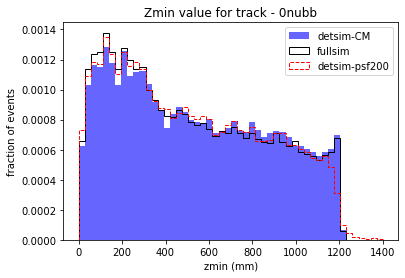

In [22]:
plt.hist(track_0nubb_zmin_DS_CM, bins = 50, range = (0, 1400), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.hist(track_0nubb_zmin_FS, bins = 50, range = (0, 1400), density=True, color='black', histtype='step', label = 'fullsim')
plt.hist(track_0nubb_zmin_DS_p200, bins = 50, range = (0, 1400), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('zmin (mm)')
plt.ylabel('fraction of events')
plt.title('Zmin value for track - 0nubb')
plt.legend(loc=1);
plt.show()

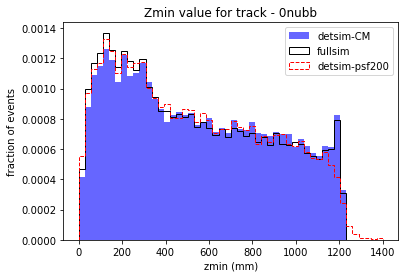

In [23]:
plt.hist(track_0nubb_zmax_DS_CM, bins = 50, range = (0, 1400), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.hist(track_0nubb_zmax_FS, bins = 50, range = (0, 1400), density=True, color='black', histtype='step', label = 'fullsim')
plt.hist(track_0nubb_zmax_DS_p200, bins = 50, range = (0, 1400), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('zmax (mm)')
plt.ylabel('fraction of events')
plt.title('Zmin value for track - 0nubb')
plt.legend(loc=1);
plt.show()

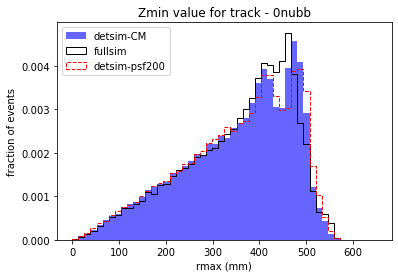

In [25]:
plt.hist(track_0nubb_rmax_DS_CM, bins = 50, range = (0, 650), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.hist(track_0nubb_rmax_FS, bins = 50, range = (0, 650), density=True, color='black', histtype='step', label = 'fullsim')
plt.hist(track_0nubb_rmax_DS_p200, bins = 50, range = (0, 650), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('rmax (mm)')
plt.ylabel('fraction of events')
plt.title('Zmin value for track - 0nubb')
plt.legend(loc=2);
plt.show()

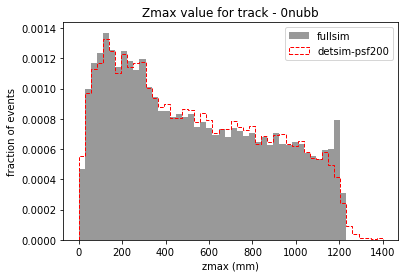

In [9]:
#Check the number of tracks with numb_of_tracks

plt.hist(track_0nubb_zmax_FS, bins = 50, range = (0, 1400), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(track_0nubb_zmax_DS_p200, bins = 50, range = (0, 1400), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('zmax (mm)')
plt.ylabel('fraction of events')
plt.title('Zmax value for track - 0nubb')
plt.legend(loc=1);
plt.show()

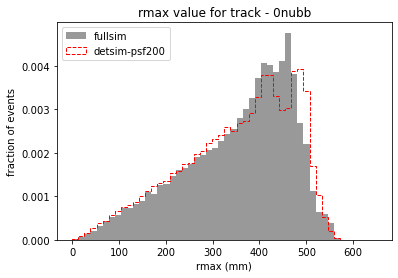

In [10]:
plt.hist(track_0nubb_rmax_FS, bins = 50, range = (0, 650), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(track_0nubb_rmax_DS_p200, bins = 50, range = (0, 650), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('rmax (mm)')
plt.ylabel('fraction of events')
plt.title('rmax value for track - 0nubb')
plt.legend(loc=2);
plt.show()

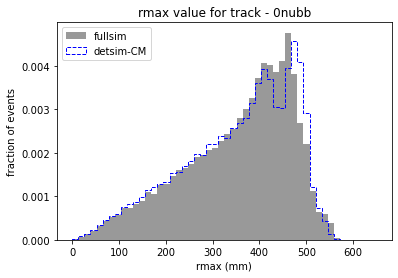

In [11]:
plt.hist(track_0nubb_rmax_FS, bins = 50, range = (0, 650), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(track_0nubb_rmax_DS_CM, bins = 50, range = (0, 650), density=True, color='blue', histtype='step', label = 'detsim-CM', linestyle='dashed')

plt.xlabel('rmax (mm)')
plt.ylabel('fraction of events')
plt.title('rmax value for track - 0nubb')
plt.legend(loc=2);
plt.show()

In [12]:
npz_path = '/Users/halmamol/NEXT/NBarrays/'
npz_filename_FS = f'trackpos_FULLSIM_R{blobR}mm.npz' 
npz_filename_DS_p200 = f'trackpos_DETSIM_psf200_R{blobR}mm.npz' 
npz_filename_DS_CM = f'trackpos_DETSIM_R{blobR}mm.npz' 

In [13]:
d_FS = np.load(npz_path+npz_filename_FS)
d_DS_p200 = np.load(npz_path+npz_filename_DS_p200)
d_DS_CM = np.load(npz_path+npz_filename_DS_CM)

In [14]:
track_0nubb_zmin_FS = d_FS['track_0nubb_zmin']
track_0nubb_zmax_FS = d_FS['track_0nubb_zmax']
track_0nubb_rmax_FS = d_FS['track_0nubb_rmax']

track_0nubb_zmin_DS_CM = d_DS_CM['track_0nubb_zmin']
track_0nubb_zmax_DS_CM = d_DS_CM['track_0nubb_zmax']
track_0nubb_rmax_DS_CM = d_DS_CM['track_0nubb_rmax']

track_0nubb_zmin_DS_p200 = d_DS_p200['track_0nubb_zmin']
track_0nubb_zmax_DS_p200 = d_DS_p200['track_0nubb_zmax']
track_0nubb_rmax_DS_p200 = d_DS_p200['track_0nubb_rmax']

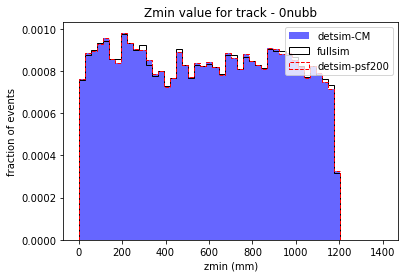

In [15]:
plt.hist(track_0nubb_zmin_DS_CM, bins = 50, range = (0, 1400), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.hist(track_0nubb_zmin_FS, bins = 50, range = (0, 1400), density=True, color='black', histtype='step', label = 'fullsim')
plt.hist(track_0nubb_zmin_DS_p200, bins = 50, range = (0, 1400), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('zmin (mm)')
plt.ylabel('fraction of events')
plt.title('Zmin value for track - 0nubb')
plt.legend(loc=1);
plt.show()

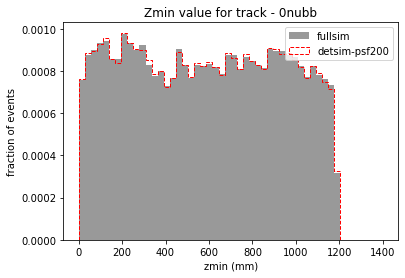

In [16]:
plt.hist(track_0nubb_zmin_FS, bins = 50, range = (0, 1400), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(track_0nubb_zmin_DS_p200, bins = 50, range = (0, 1400), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('zmin (mm)')
plt.ylabel('fraction of events')
plt.title('Zmin value for track - 0nubb')
plt.legend(loc=1);
plt.show()

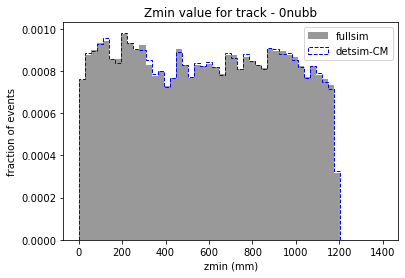

In [17]:
plt.hist(track_0nubb_zmin_FS, bins = 50, range = (0, 1400), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(track_0nubb_zmin_DS_CM, bins = 50, range = (0, 1400), density=True, color='blue', histtype='step', label = 'detsim-CM', linestyle='dashed')

plt.xlabel('zmin (mm)')
plt.ylabel('fraction of events')
plt.title('Zmin value for track - 0nubb')
plt.legend(loc=1);
plt.show()

NameError: name 'track_0nubb_zmax_DS' is not defined

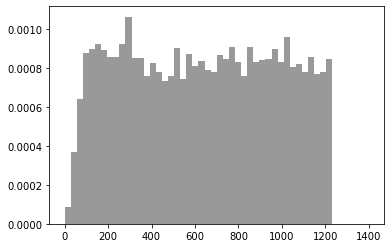

In [18]:
#Check the number of tracks with numb_of_tracks

plt.hist(track_0nubb_zmax_FS, bins = 50, range = (0, 1400), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(track_0nubb_zmax_DS, bins = 50, range = (0, 1400), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('zmax (mm)')
plt.ylabel('fraction of events')
plt.title('Zmax value for track - 0nubb')
plt.legend(loc=1);
plt.show()

In [ ]:
#Check the number of tracks with numb_of_tracks

plt.hist(track_0nubb_rmax_DS_p200, bins = 50, range = (0, 650), density=True, alpha=0.6, color='b', label = 'detsim psf200')
plt.hist(track_0nubb_rmax_FS, bins = 50, range = (0, 650), density=True, color='black', histtype='step', label = 'fullsim')
plt.hist(track_0nubb_rmax_DS, bins = 50, range = (0, 650), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('rmax (mm)')
plt.ylabel('fraction of events')
plt.title('Rmax value for track - 0nubb')
plt.legend(loc=2);
plt.show()

In [ ]:
#Check the number of tracks with numb_of_tracks

plt.hist(track_0nubb_rmax_FS, bins = 50, range = (0, 650), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(track_0nubb_rmax_DS, bins = 50, range = (0, 650), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('rmax (mm)')
plt.ylabel('fraction of events')
plt.title('Rmax value for track - 0nubb')
plt.legend(loc=2);
plt.show()